In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline


In [ ]:
x = 6*np.random.rand(200,1) - 3
# This is a Python code that generates an array x with 200 rows and 1 column, filled with random numbers between -3 and 3.

y= 0.8 * x**2 + 0.9 * x + 2 +np.random.randn(200,1)
# +np.random.randn(200,1)------This is a Python code that generates an array with 200 rows and 1 column,
#  filled with random numbers generated from a standard normal distribution (mean=0, variance=1).

# y=0.8x^2 + 0.9x + 2

In [ ]:
x

In [ ]:
x.shape

(200, 1)

In [ ]:
y.shape

(200, 1)

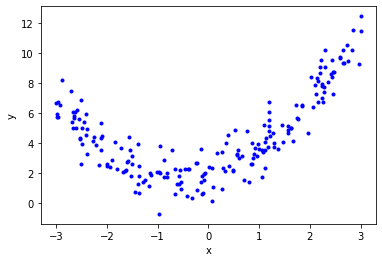

In [ ]:
plt.plot(x,y,"b.")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
# Applying Linear regression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)


In [ ]:
r2_score(y_test,y_pred)

0.14678924292639306

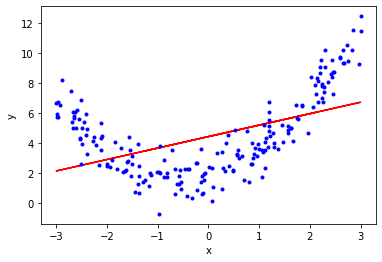

In [ ]:
plt.plot(x_train,lr.predict(x_train),color="r")
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# Applying polynomial linear regression
# degree 2

poly = PolynomialFeatures(degree=2)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [ ]:
print(x_train[0])
print(x_train_trans[0])

[2.15357535]
[1.         2.15357535 4.63788679]


In [ ]:
# include bias parameter

In [ ]:
# poly = PolynomialFeatures(degree=2,include_bias=False) # neglects intercept
#                                                         # by default include_bias is True

# x_train_trans = poly.fit_transform(x_train)
# x_test_trans = poly.fit_transform(x_test)

In [ ]:
# print(x_train[0])
# print(x_train_trans[0])

In [ ]:
lr=LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test_trans)

In [ ]:
r2_score(y_test,y_pred)

0.7984024906952212

In [ ]:
print(lr.coef_)
print(lr.intercept_)    # y=0.8x^2 + 0.9x + 2

[[0.         0.82127511 0.81886912]]
[1.87745061]


In [ ]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

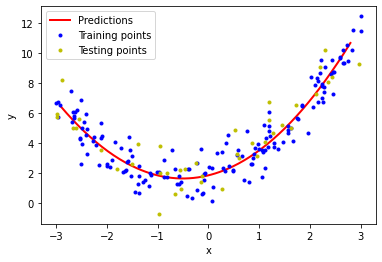

In [ ]:
plt.plot(x_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(x_train, y_train, "b.",label="Training points")
plt.plot(x_test, y_test,"y.",label = "Testing points")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    x_new=np.linspace(-3, 3, 100).reshape(100, 1)
    x_new_poly = poly.transform(x_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

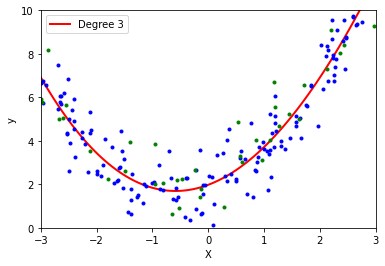

In [ ]:
polynomial_regression(3)

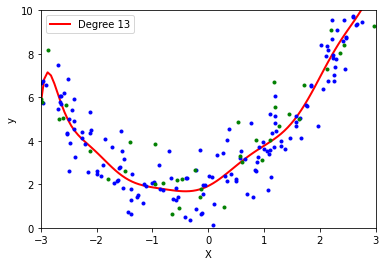

In [ ]:
polynomial_regression(13)

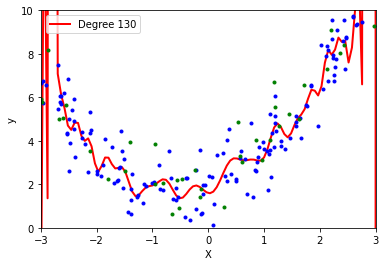

In [ ]:
polynomial_regression(130)

In [ ]:
poly.powers_  #

array([[0],
       [1],
       [2]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


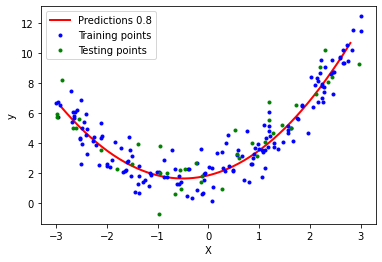

In [ ]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(x_train_trans,y_train)

x_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = sgd.predict(x_new_poly)

y_pred = sgd.predict(x_test_trans)

plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:
# ***************************************************************************************
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)


In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [ ]:
# ******************************************************************************************************
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=10)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 66
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.



In [ ]:
X_multi_trans.shape

(100, 66)

In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [ ]:
X_test_multi = poly.transform(final)

In [ ]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [ ]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

# change the degree and observe this